https://blog.csdn.net/qq_39516859/article/details/81705010

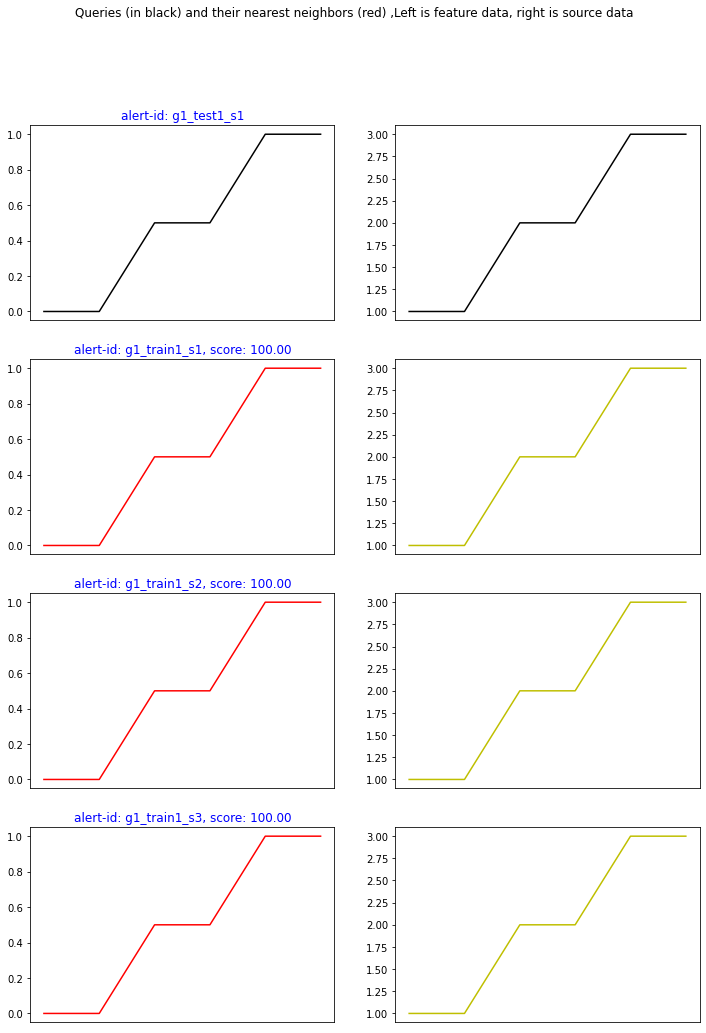

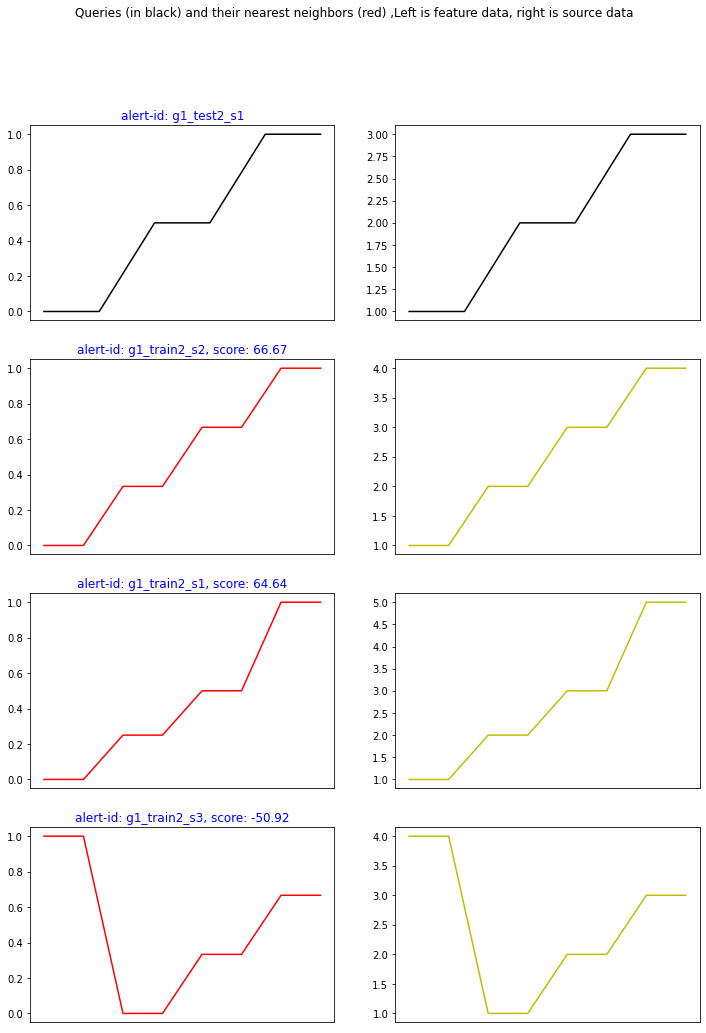

In [7]:
import numpy
import matplotlib.pyplot as plt
from tslearn.neighbors import KNeighborsTimeSeries
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.utils import to_time_series_dataset
import os, requests, json
def handle_ts_data_length(data, length):
    return data[:length]

def handle_data(data):
    test = data['test']
    train = data['train']
    testKeys = []
    trainKeys = []
    testVals = []
    trainVals = []
    for item in train:
        key = item['key']
        val = item['val']
        tsvalue = handle_ts_data_length(val, 1000)
        trainKeys.append(key)
        trainVals.append(tsvalue)

    for item in test:
            key = item['key']
            val = item['val']
            tsvalue = handle_ts_data_length(val, 1000)
            testKeys.append(key)
            testVals.append(tsvalue)

    return testKeys, testVals, trainKeys, trainVals

def get_data(case):
    #1.测试数据为单条
    #1_1.两组数据完全相同
    if case == 1_1:
        test = [{"key":"g1_test1_s1", "val":[1,1,2,2,3,3]}]
        train = [{"key":"g1_train1_s1", "val":[1,1,2,2,3,3]},
        {"key":"g1_train1_s2", "val":[1,1,2,2,3,3]},
        {"key":"g1_train1_s3", "val":[1,1,2,2,3,3]}]
    #1_2.训练数据和测试数据部分重合，且训练数据数量大于测试数据
    if case == 1_2:
        test = [{"key":"g1_test2_s1", "val":[1,1,2,2,3,3]}]
        train = [{"key":"g1_train2_s1", "val":[1,1,2,2,3,3,5,5]},
        {"key":"g1_train2_s2", "val":[1,1,2,2,3,3,4,4]},
        {"key":"g1_train2_s3", "val":[4,4,1,1,2,2,3,3]}]
    return {"test": test, "train":train}

def transform_data(data):
    res = []
    for x in data:
        z = float(x)
        res.append(z)
    return res

def trainAndPilot(case):
    data = get_data(case)
    testKeys, testVals, trainKeys, trainVals= handle_data(data)
    train_len = len(trainKeys)
    n_neighbors = train_len
    X = to_time_series_dataset(trainVals)
    X_train = TimeSeriesScalerMinMax().fit_transform(X)
    X_test = TimeSeriesScalerMinMax().fit_transform(to_time_series_dataset(testVals))
    knn = KNeighborsTimeSeries(n_neighbors=n_neighbors,metric="dtw")
    knn.fit(X_train)
    ind = knn.kneighbors(X_test, return_distance=True)
    #距离
    # print(ind[0])
    # #对应的数组下标
    # print(ind[1])

    plt.figure(figsize=(12, 16.5))
    plt.subplot(n_neighbors + 1, 2, 1)
    plt.plot(X_test.ravel(), "k-")
    plt.title("alert-id: " + str(testKeys[0]), {'color':'blue'})
    plt.xticks([])

    plt.subplot(n_neighbors + 1, 2, 2)
    plt.plot(transform_data(testVals[0]), "k-")
    plt.xticks([])
    for rank_nn in range(n_neighbors):
        plt.subplot(n_neighbors + 1, 2, rank_nn * 2 + 3 )
        paid = trainKeys[ind[1][0][rank_nn]]
        pascore = format(100 - (ind[0][0][rank_nn] * 100), '.2f')
        title = "alert-id: " + str(paid) + ", score: " + str(pascore)
        plt.plot(X_train[ind[1][0, rank_nn]].ravel(), "r-")
        plt.title(title, {'color':'blue'})
        plt.xticks([])

        plt.subplot(n_neighbors + 1, 2, rank_nn * 2 + 4 )
        itts = trainVals[ind[1][0][rank_nn]]
        plt.plot(transform_data(itts), "y-")
        plt.xticks([])


    plt.suptitle( "Queries (in black) and their nearest neighbors (red) ,Left is feature data, right is source data")
    plt.show()
    #plt.savefig('1.png')

def test_all():
    trainAndPilot(1_1)
    trainAndPilot(1_2)

test_all()

